# Example: Subset an FVCOM dataset in a netcdf file given a polygon

**NOTE:** this is currently broken -- maybe because it's in 0--360 coords

This is an example using a tiny dataset -- small enough to put in git.

But you can point it to a real one from here:

https://noaa-nos-ofs-pds.s3.amazonaws.com/index.html#sfbofs/


In [7]:
import cf_xarray # noqa
import fsspec
import numpy as np
import xarray as xr

import xarray_subset_grid.accessor  # noqa: F401


In [27]:
FILENAME = "example_data/SFBOFS_subset2.nc"

# Open the netcf file as a dataset.
ds = xr.open_dataset(FILENAME)

print(ds['lon'].data.min())
print(ds['lon'].data.max())

print("variables are:", [str(k) for k  in ds.keys()])

237.65213
237.79214
variables are: ['x', 'y', 'requested_times', 'cell', 'h', 'nv', 'nbe', 'nf_type', 'Times', 'zeta', 'temp', 'salinity', 'u', 'v', 'uwind_speed', 'vwind_speed', 'wet_nodes', 'wet_cells']


In [11]:
from xarray_subset_grid.utils import convert_bytes
f"Dataset size: {convert_bytes(ds.nbytes)}"

'Dataset size: 3.3 MB'

In [29]:
ds.time


<xarray.DataArray 'time' (time: 49)> Size: 392B
array(['2024-05-23T00:00:00.000000000', '2024-05-23T00:59:45.937500032',
       '2024-05-23T02:00:14.062499968', '2024-05-23T03:00:00.000000000',
       '2024-05-23T03:59:45.937500032', '2024-05-23T05:00:14.062499968',
       '2024-05-23T06:00:00.000000000', '2024-05-23T06:59:45.937500032',
       '2024-05-23T08:00:14.062499968', '2024-05-23T09:00:00.000000000',
       '2024-05-23T09:59:45.937500032', '2024-05-23T11:00:14.062499968',
       '2024-05-23T12:00:00.000000000', '2024-05-23T12:59:45.937500032',
       '2024-05-23T14:00:14.062499968', '2024-05-23T15:00:00.000000000',
       '2024-05-23T15:59:45.937500032', '2024-05-23T17:00:14.062499968',
       '2024-05-23T18:00:00.000000000', '2024-05-23T18:59:45.937500032',
       '2024-05-23T20:00:14.062499968', '2024-05-23T21:00:00.000000000',
       '2024-05-23T21:59:45.937500032', '2024-05-23T23:00:14.062499968',
       '2024-05-24T00:00:00.000000000', '2024-05-24T00:59:45.937500032',
       '2024-05-24T02:00:14.062499968', '2024-05-24T03:00:00.000000000',
       '2024-05-24T03:59:45.937500032', '2024-05-24T05:00:14.062499968',
       '2024-05-24T06:00:00.000000000', '2024-05-24T06:59:45.937500032',
       '2024-05-24T08:00:14.062499968', '2024-05-24T09:00:00.000000000',
       '2024-05-24T09:59:45.937500032', '2024-05-24T11:00:14.062499968',
       '2024-05-24T12:00:00.000000000', '2024-05-24T12:59:45.937500032',
       '2024-05-24T14:00:14.062499968', '2024-05-24T15:00:00.000000000',
       '2024-05-24T15:59:45.937500032', '2024-05-24T17:00:14.062499968',
       '2024-05-24T18:00:00.000000000', '2024-05-24T18:59:45.937500032',
       '2024-05-24T20:00:14.062499968', '2024-05-24T21:00:00.000000000',
       '2024-05-24T21:59:45.937500032', '2024-05-24T23:00:14.062499968',
       '2024-05-25T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 392B 2024-05-23 ... 2024-05-25
Attributes:
    long_name:  time
    format:     defined reference date
    time_zone:  UTC

### Example Polygon

Drawn with: https://geojson.io

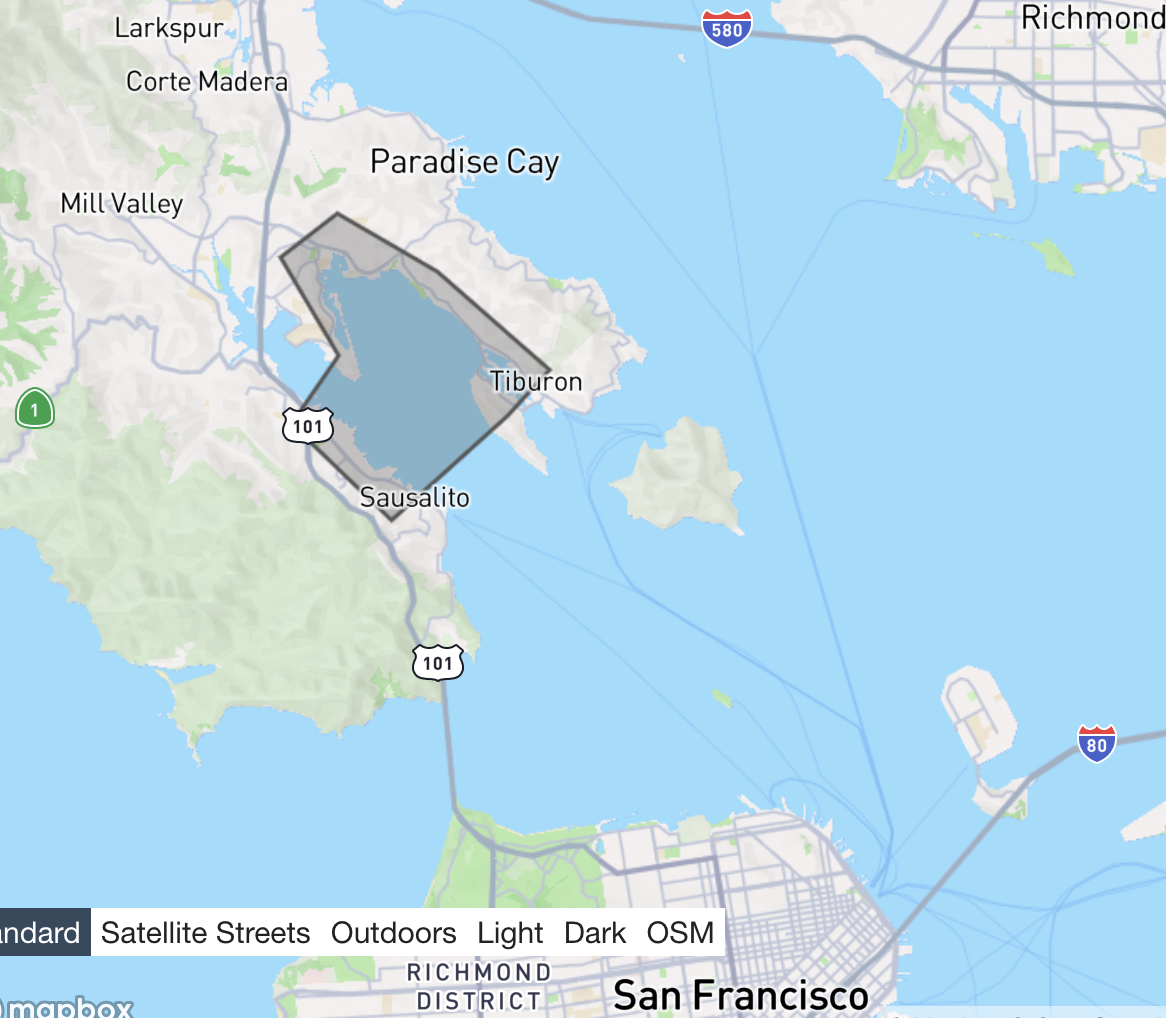

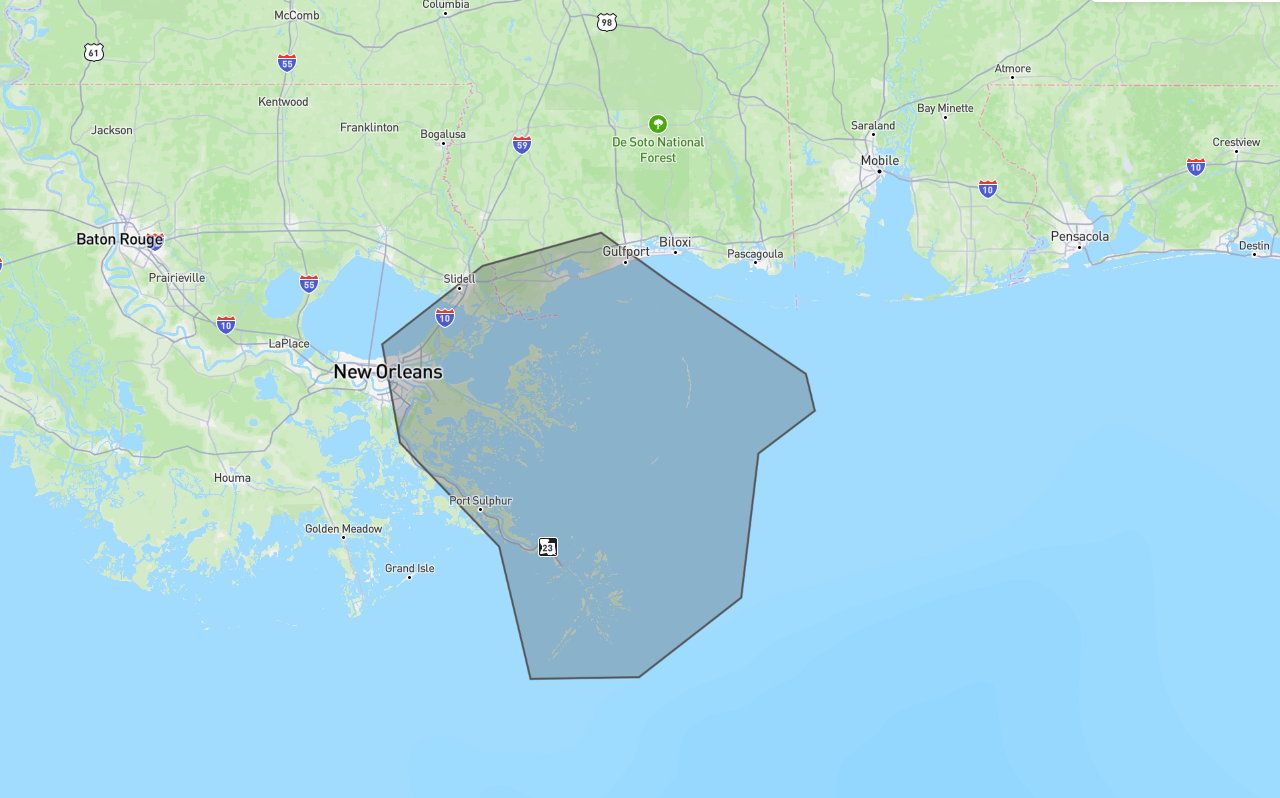

In [21]:
# polygon is in -180 -- 180 coords
# model file is in 0--360

polygon = np.array(
          [[-122.49008935972195, 37.85535293037749],
           [-122.46663678349302, 37.872023874021735],
           [-122.45807326471191, 37.87939868575954],
           [-122.48078332775191, 37.89508822711183],
           [-122.50107641768733, 37.90437518996049],
           [-122.51257315724197, 37.89737526062751],
           [-122.50081931329709, 37.88165893138216],
           [-122.51039590603393, 37.870731699265534],
           [-122.49008935972195, 37.85535293037749]] 
)
polygon

array([[-122.49008936,   37.85535293],
       [-122.46663678,   37.87202387],
       [-122.45807326,   37.87939869],
       [-122.48078333,   37.89508823],
       [-122.50107642,   37.90437519],
       [-122.51257316,   37.89737526],
       [-122.50081931,   37.88165893],
       [-122.51039591,   37.8707317 ],
       [-122.49008936,   37.85535293]])

We can subset down to the variables we care about, while keeping the grid information for later analysis

In [30]:
ds_zeta = ds.subset_grid.subset_vars(['zeta', 'u', 'v'])
ds_zeta

<xarray.Dataset> Size: 3MB
Dimensions:          (nply: 8, two: 2, node: 1364, nele: 2318, three: 3,
                      time: 49)
Coordinates:
    lon              (node) float32 5kB 237.7 237.7 237.7 ... 237.8 237.8 237.8
    lat              (node) float32 5kB ...
    lonc             (nele) float32 9kB ...
    latc             (nele) float32 9kB ...
  * node             (node) int32 5kB 16693 16861 16862 ... 28423 28424 28602
  * time             (time) datetime64[ns] 392B 2024-05-23 ... 2024-05-25
Dimensions without coordinates: nply, two, nele, three
Data variables: (12/18)
    x                (nply) float32 32B ...
    y                (nply) float32 32B ...
    requested_times  (two) |S26 52B ...
    cell             (nele) int32 9kB ...
    h                (node) float32 5kB ...
    nv               (three, nele) int32 28kB ...
    ...               ...
    u                (time, nele) float32 454kB ...
    v                (time, nele) float32 454kB ...
    uwind_speed      (time, nele) float32 454kB ...
    vwind_speed      (time, nele) float32 454kB ...
    wet_nodes        (time, node) int32 267kB ...
    wet_cells        (time, nele) int32 454kB ...
Attributes: (12/17)
    note:                        Output from CO-OPS subsetting/Aggregation tool
    user_email:                  Chris.Barker@noaa.gov
    format:                      netCDF-4/HDF5 file
    title:                       SFBOFS
    institution:                 School for Marine Science and Technology
    source:                      FVCOM_4.3
    ...                          ...
    Tidal_Forcing:               Tidal Forcing Time Series Title: sfbofs late...
    River_Forcing:               THERE ARE 9 RIVERS IN THIS MODEL.\nRIVER INF...
    GroundWater_Forcing:         GROUND WATER FORCING IS OFF!
    Surface_Heat_Forcing:        FVCOM variable surface heat forcing file:\nF...
    Surface_Wind_Forcing:        FVCOM variable surface Wind forcing:\nFILE N...
    Surface_PrecipEvap_Forcing:  SURFACE PRECIPITATION FORCING IS OFF

Then we can subset the grid down to the target area

In [14]:
ds_subset = ds_zeta.subset_grid.subset_polygon(polygon)
assert(ds_subset is not None)
ds_subset

AssertionError: 

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri

zeta = ds_subset.zeta.isel(time=0)
tris = tri.Triangulation(zeta.cf['longitude'], zeta.cf['latitude'], ds_subset[ds_subset.fvcom_mesh.face_node_connectivity].T - 1)
plt.tripcolor(tris, zeta, shading='flat')

In [ ]:
f"Subset dataset size: {ds_subset.nbytes * 1.0e-6} Mb"